### Алгоритм Куна

In [72]:
import numpy as np

# Алгоритм Куна
def kuhn_algorithm(g):
	n = len(g)
	m = len(g[0])

	match_counts = 0

	match = np.full(m,-1)
	used = np.full(n,False)
	result = np.zeros((n,m))

	def try_kuhn(v):
		if used[v]:
			return False

		used[v] = True

		for u in range(m):
			if g[v][u] == 0:
				continue
			
			if match[u] == -1 or try_kuhn(match[u]):
				match[u] = v
				return True
		
		return False
	
	for v in range(n):
		used[:] = np.full(n,False)
		match_counts += try_kuhn(v)

	for u in range(m):
		if match[u] != -1:
			result[match[u]][u] = g[match[u]][u]

	return result, match, match_counts


### Отрисовка графа

In [8]:
import matplotlib.pyplot as plt

def show_graph(g):
	plt.figure()

	n = len(g)
	m = len(g[0])

	d1 = 2.0 / n
	d2 = 2.0 / m

	for i in range(n):
		
		for j in range(m):
			if g[i][j] != 0:
				plt.plot(
					[-1.0,1.0],
					[1.0 - d1 * i,1.0 - d2 * j],
					color= 'red' if g[i][j] > 1 else 'black',
					ls='-',
					marker='',
					linewidth = abs(g[i][j])
				)

		plt.text(-1.1,1.0 - d1 * i,i,ha = 'right',va = 'center')
		plt.plot(-1.0,1.0 - d1 * i,'o',color = 'black')
			
	for j in range(m):
		plt.text(1.1,1.0 - d2 * j,j,ha = 'left',va = 'center')
		plt.plot(1.0,1.0 - d2 * j,'o',color = 'black')
		
	plt.axis('off')

### Пример на случайном графе

In [67]:
import numpy.random as rnd

def random_graph(n,m):
	return rnd.randint(0, 2, size=(n,m))

5

array([ 4,  2,  0,  1,  3, -1, -1, -1])

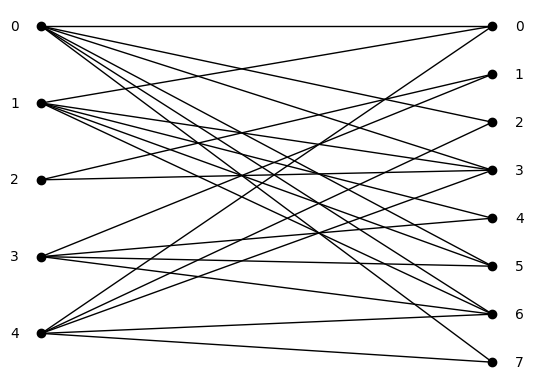

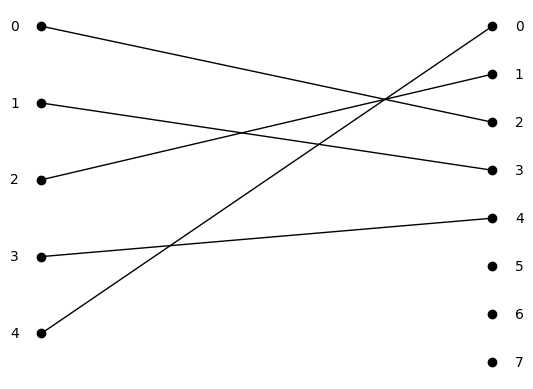

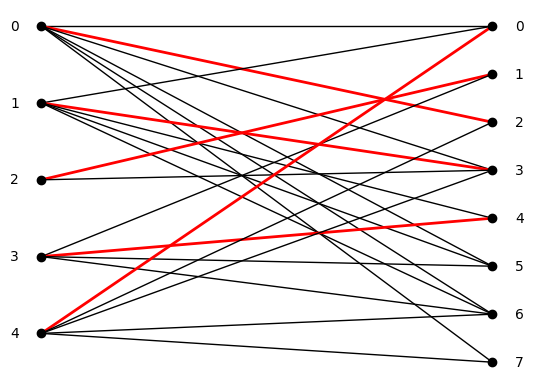

In [73]:
graph = random_graph(5,8)

show_graph(graph)

result,match,count = kuhn_algorithm(graph)

display(count,match)

show_graph(result)

show_graph(graph + result)